In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
import numpy as np


In [5]:
df = pd.read_csv('superbowl.csv')

In [6]:
df.head()

,Date,SB,Winner,Winner Pts,Loser,Loser Pts,MVP,Stadium,City,State
0,Feb 2 2020,LIV (54),Kansas City Chiefs,31,San Francisco 49ers,20,Patrick Mahomes,Hard Rock Stadium,Miami Gardens,Florida
1,Feb 3 2019,LIII (53),New England Patriots,13,Los Angeles Rams,3,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia
2,Feb 4 2018,LII (52),Philadelphia Eagles,41,New England Patriots,33,Nick Foles,U.S. Bank Stadium,Minneapolis,Minnesota
3,Feb 5 2017,LI (51),New England Patriots,34,Atlanta Falcons,28,Tom Brady,NRG Stadium,Houston,Texas
4,Feb 7 2016,50,Denver Broncos,24,Carolina Panthers,10,Von Miller,Levi's Stadium,Santa Clara,California


In [7]:
# Notice that mean between points number of winner is almost double of points number of loser
df.describe()

,Winner Pts,Loser Pts
count,54.000000,54.000000
mean,30.111111,16.203704
std,9.766455,7.413348
min,13.000000,3.000000
25%,23.250000,10.000000
50%,30.500000,17.000000
75%,35.000000,21.000000
max,55.000000,33.000000


In [87]:
# Define year of superbowl as index.
df['Year'] = df.apply(lambda x: int(x['Date'][-4:]), axis=1)
df.set_index(df['Year'], inplace=True)

In [88]:
# Slice by decades
beginners = df.loc[df['Year'] < 1980]
boomers = df.loc[(df['Year'] > 1980) & (df['Year'] < 2000)]
millenium = df.loc[df['Year'] > 2000]

In [108]:
def create_axis(ax, title, y_label):
    ax.tick_params(axis='x', rotation=70)
    ax.set_xlabel('Years')
    ax.set_ylabel(y_label)
    ax.set_title(title)

<BarContainer object of 20 artists>

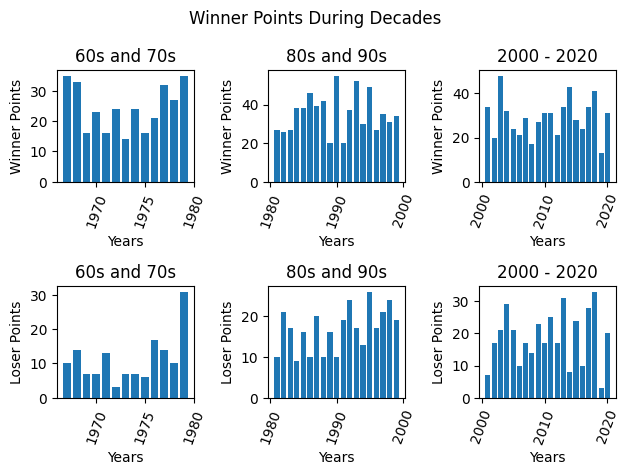

In [112]:
# Winner Points 60's and 70's
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, tight_layout=True)
create_axis(ax1, '60s and 70s', 'Winner Points')
create_axis(ax2, '80s and 90s', 'Winner Points')
create_axis(ax3, '2000 - 2020', 'Winner Points')
create_axis(ax4, '60s and 70s', 'Loser Points')
create_axis(ax5, '80s and 90s', 'Loser Points')
create_axis(ax6, '2000 - 2020', 'Loser Points')

fig.suptitle('Winner Points During Decades')
ax1.bar(beginners['Year'], beginners['Winner Pts'])
ax2.bar(boomers['Year'], boomers['Winner Pts'])
ax3.bar(millenium['Year'], millenium['Winner Pts'])
ax4.bar(beginners['Year'], beginners['Loser Pts'])
ax5.bar(boomers['Year'], boomers['Loser Pts'])
ax6.bar(millenium['Year'], millenium['Loser Pts'])